In [158]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st

#Import or Export to my SQL
# Name of database: 'match_project'

from sqlalchemy import create_engine 
import pymysql.cursors
import os
# import getpass
import urllib.parse

import requests
import config

from datetime import datetime
import locale
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

Part 0: getting the data, cleaning and wrangling

In [2]:
# importing the consumption data
df = pd.read_csv("data/measurements.csv")

In [6]:
# First looks at the dataframe, shape, null values, dtypes... to anticipate on corrections
df.shape

(388, 12)

In [7]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [8]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [9]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [11]:
df.specials.value_counts() # checking the values, looking at the excel sheet to check if values match columns AC, rain and sun

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [12]:
#1 To remove refill_liters and refill_gass
#2 Distance, consume, temp_inside, temp_outside to change the ',' into '.' and convert into float
#3 temp_inside, to fill in the null values with average temperature
#4 specials: to correct the 1 AC that is 0 when it says 'ac' in specials; to remove specials after (note snow = rain)

In [13]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [15]:
df = df[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'specials', 'gas_type', 'AC', 'rain', 'sun']]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,NaN,E10,0,0,0
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0
385,16,"3,8",45,25,19,NaN,SP98,0,0,0
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0


In [17]:
df.distance = df.distance.str.replace(',', '.').apply(lambda x : float(x))
df.consume = df.consume.str.replace(',', '.').apply(lambda x : float(x))


AttributeError: Can only use .str accessor with string values!

In [19]:
def inside(x):
    if x isintance(stri

distance        float64
consume         float64
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [23]:
df.temp_inside = df.temp_inside.str.replace(',', '.').apply(lambda x : -1 if x is None else float(x))

C:\Users\Javier\AppData\Local\Temp\ipykernel_22700\3400076421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.temp_inside = df.temp_inside.str.replace(',', '.').apply(lambda x : -1 if x is None else float(x))


In [25]:
df.temp_inside = df.temp_inside.apply(lambda x: mean(df.temp_inside[df.temp_inside != -1]) if x == -1 else x)

C:\Users\Javier\AppData\Local\Temp\ipykernel_22700\333457368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.temp_inside = df.temp_inside.apply(lambda x: mean(df.temp_inside[df.temp_inside != -1]) if x == -1 else x)


In [43]:
value = df.temp_inside.mean()
df.temp_inside.fillna(value, inplace = True)


In [44]:
df.temp_inside.isna().sum()

0

In [29]:
df['AC'][334] = 1
df[df.specials == 'ac']

C:\Users\Javier\AppData\Local\Temp\ipykernel_22700\350768019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AC'][334] = 1


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
302,16.6,4.4,46,22.0,5,ac,SP98,1,0,0
303,29.9,4.5,32,22.0,18,ac,SP98,1,0,0
334,129.7,4.6,58,24.0,21,ac,E10,1,0,0
367,15.4,5.0,48,25.5,31,ac,SP98,1,0,0
368,16.0,4.0,43,22.0,21,ac,SP98,1,0,0
373,15.3,6.6,16,24.0,27,ac,SP98,1,0,0
374,28.5,4.0,44,25.0,23,ac,SP98,1,0,0
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0


In [31]:
# removing the specials column
df = df.drop('specials', axis = 1)
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


Part II: EDA

In [45]:
# EDA looking at the spread of data per column etc...
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.079897,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.271484,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [46]:
def cat_stats(df, column):
    """Function to generate the statistical data for categorical columns"""
    print(f'****** Brief analysis of {column} *****')
    frequency_table = df[column].value_counts()
    # Calculating the proportion of each unique value 
    proportion_table = df[column].value_counts(normalize=True)
    display(frequency_table, proportion_table)
      
    mode_col = df[column].mode()
    display(f'mode = {mode_col}')
          
    # Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
    sns.countplot(data=df, x= column, palette="Set1")
    plt.show()

In [47]:
# to keep as long as not working via the function_file.py (Javier) -ot gives an intermittent error sometimes
# it works other times no, so was kept to run the code
def num_stats(df, column):
    """Function to generate the statistical data for numerical columns à la describe with mode in addition"""
    print(f'****** Brief Analysis of {column} *****')
          
    mean_col = df[column].mean().round()
    median_col = df[column].median()
    mode_col = df[column].mode()[0]
    variance_col = round(df[column].var(),2)
    std_dev_col = round(df[column].std(),2)
    min_col = df[column].min()
    max_col = df[column].max()
    range_col = max_col - min_col
    quantiles_col = df[column].quantile([0.25, 0.5, 0.75])

    print(f'mean= {mean_col}, median= {median_col}, mode= {mode_col}')
    print(f'var = {variance_col}, std_dev = {std_dev_col}, min = {min_col}, max = {max_col}, range = {range_col}')
    print(f'quantiles : \n{quantiles_col}')
    
    # Plotting a histogram for the column of the 'data' dataframe
    # 'bins=30' divides the data into 30 bins for more detailed granularity
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    plt.show()  # to show the plot as it goes!
    sns.boxplot(data = df[column], color="lightgreen")
    plt.show()  # to show the plot as it goes!

In [49]:
numerical = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']
categorical = ['gas_type', 'AC', 'rain', 'sun']


****** Brief analysis of gas_type *****


gas_type
SP98    228
E10     160
Name: count, dtype: int64

gas_type
SP98    0.587629
E10     0.412371
Name: proportion, dtype: float64

'mode = 0    SP98\nName: gas_type, dtype: object'

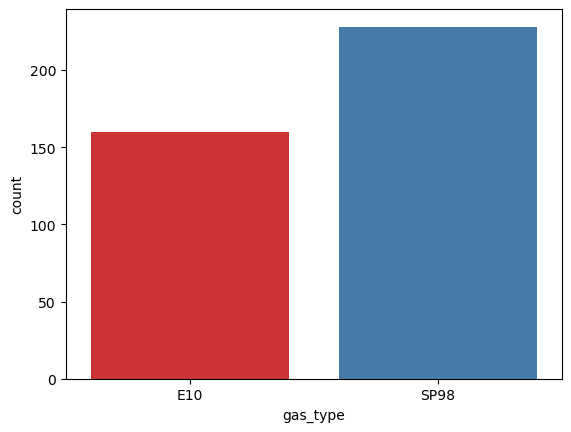

****** Brief analysis of AC *****


AC
0    357
1     31
Name: count, dtype: int64

AC
0    0.920103
1    0.079897
Name: proportion, dtype: float64

'mode = 0    0\nName: AC, dtype: int64'

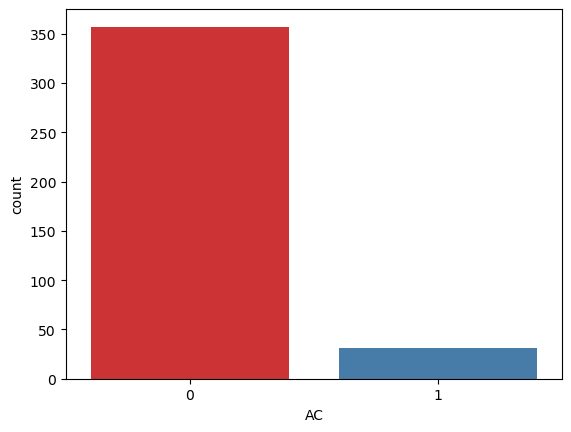

****** Brief analysis of rain *****


rain
0    340
1     48
Name: count, dtype: int64

rain
0    0.876289
1    0.123711
Name: proportion, dtype: float64

'mode = 0    0\nName: rain, dtype: int64'

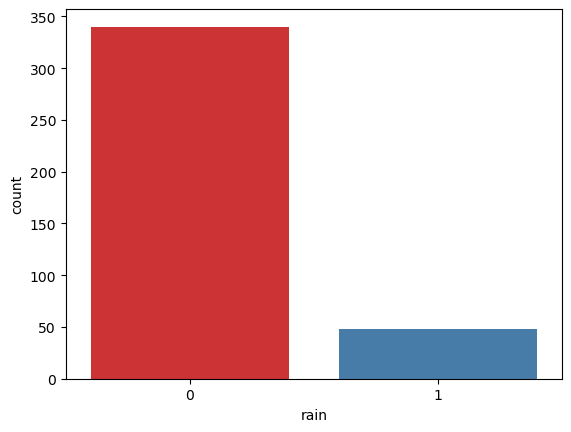

****** Brief analysis of sun *****


sun
0    356
1     32
Name: count, dtype: int64

sun
0    0.917526
1    0.082474
Name: proportion, dtype: float64

'mode = 0    0\nName: sun, dtype: int64'

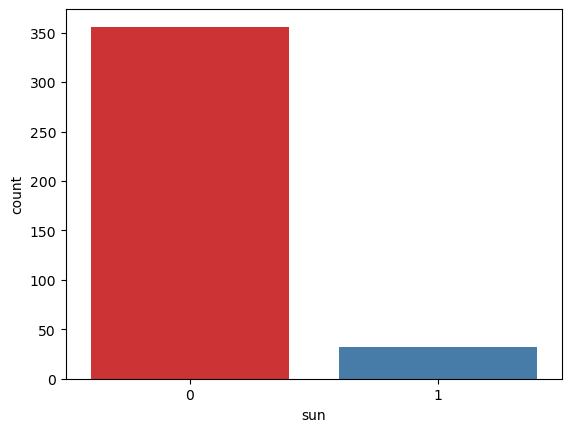

In [50]:
for col in categorical:
    cat_stats(df, col)

In [51]:
# Quick analysis categorical:
# Type of gas: 59% vs 41%, likely to be comparable groups
# AC is about 8% of the time, is it meaningful?
# Rain is about 12% of the time, is it meaningful?
# Sun is about 8% of the time, is it meaningful?

****** Brief Analysis of distance *****
mean= 20.0, median= 14.6, mode= 11.8
var = 513.83, std_dev = 22.67, min = 1.3, max = 216.1, range = 214.79999999999998
quantiles : 
0.25    11.8
0.50    14.6
0.75    19.0
Name: distance, dtype: float64


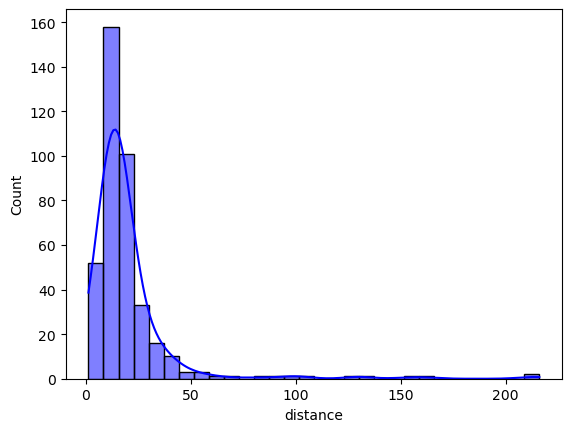

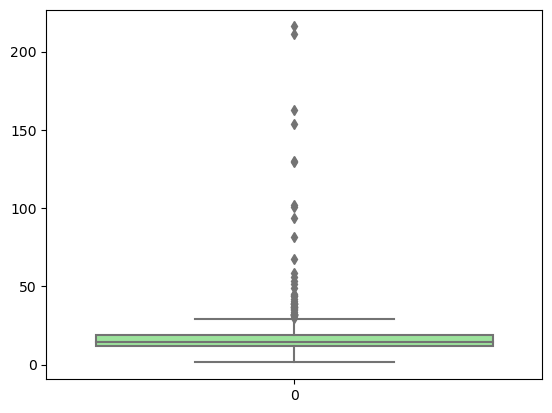

****** Brief Analysis of consume *****
mean= 5.0, median= 4.7, mode= 4.5
var = 1.07, std_dev = 1.03, min = 3.3, max = 12.2, range = 8.899999999999999
quantiles : 
0.25    4.3
0.50    4.7
0.75    5.3
Name: consume, dtype: float64


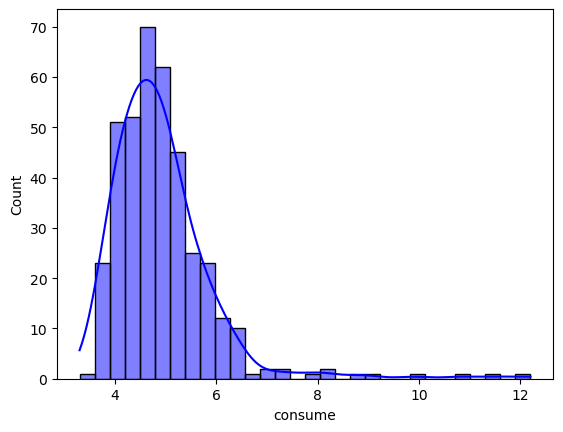

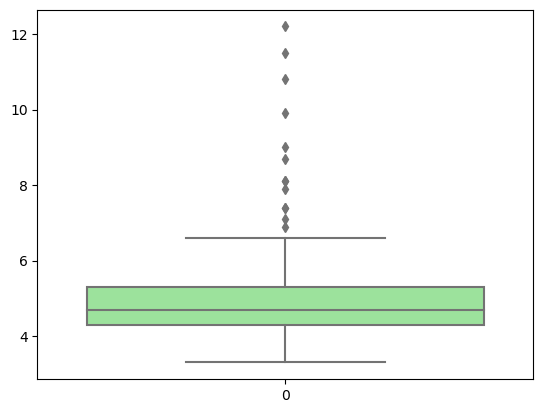

****** Brief Analysis of speed *****
mean= 42.0, median= 40.5, mode= 42
var = 184.92, std_dev = 13.6, min = 14, max = 90, range = 76
quantiles : 
0.25    32.75
0.50    40.50
0.75    50.00
Name: speed, dtype: float64


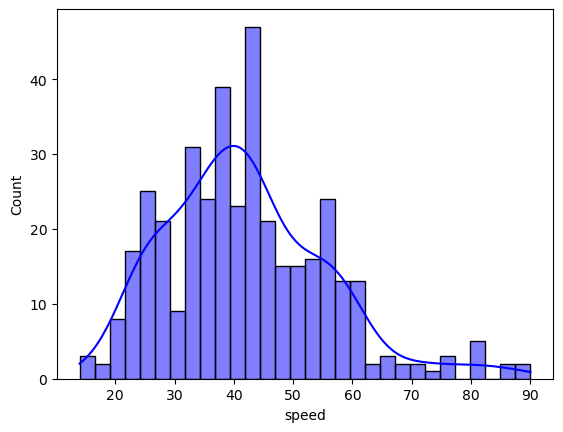

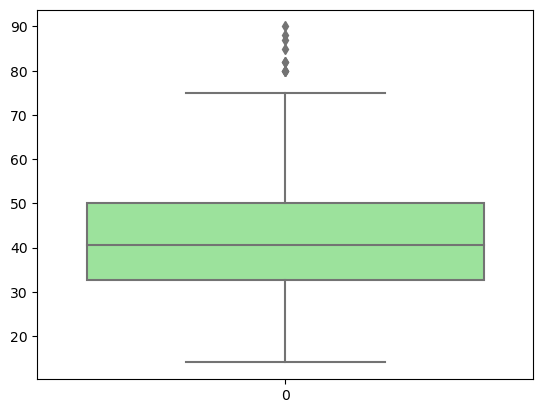

****** Brief Analysis of temp_inside *****
mean= 22.0, median= 22.0, mode= 21.5
var = 0.99, std_dev = 0.99, min = 19.0, max = 25.5, range = 6.5
quantiles : 
0.25    21.5
0.50    22.0
0.75    22.5
Name: temp_inside, dtype: float64


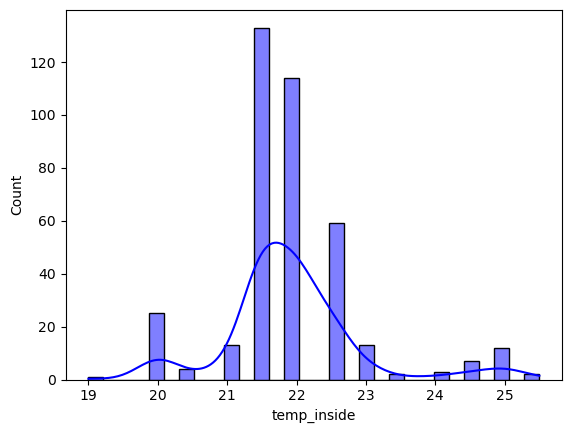

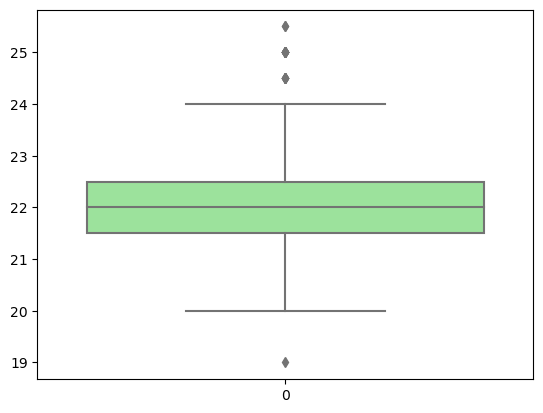

****** Brief Analysis of temp_outside *****
mean= 11.0, median= 10.0, mode= 8
var = 48.88, std_dev = 6.99, min = -5, max = 31, range = 36
quantiles : 
0.25     7.0
0.50    10.0
0.75    16.0
Name: temp_outside, dtype: float64


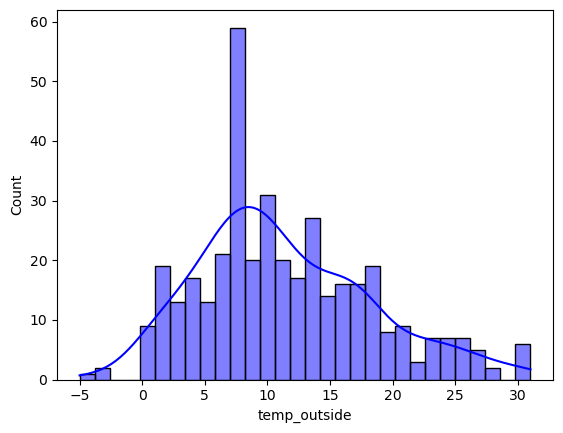

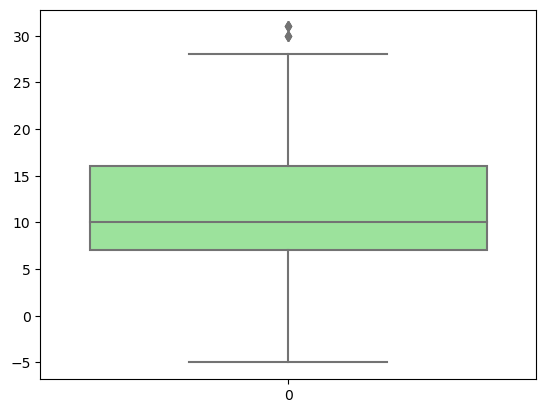

In [52]:
for col in numerical:
    num_stats(df, col)

In [ ]:
# Brief analysis:
# Distance: mean is 20 km vs 14.6 for the median, when the mode is 11.8 => right skewed (some very high values, outliers)
# Consume: mode at 4.5L/100km , median is at 4.7, and mean at 5 ! closer to a normal distribution, but not perfect, with 
#          some right skewed too with bursts of high consumption
# speed: median, mode and average are close (40.5 for median, 42 for the two others), varies on both sides with some low and
#        high values but not completely off
# Temperatures (inside and outside): kind of 'normally distributed' but flatter.

In [55]:
df_E10 = df[df['gas_type'] == 'E10']
df_SP98 = df[df['gas_type'] == 'SP98']

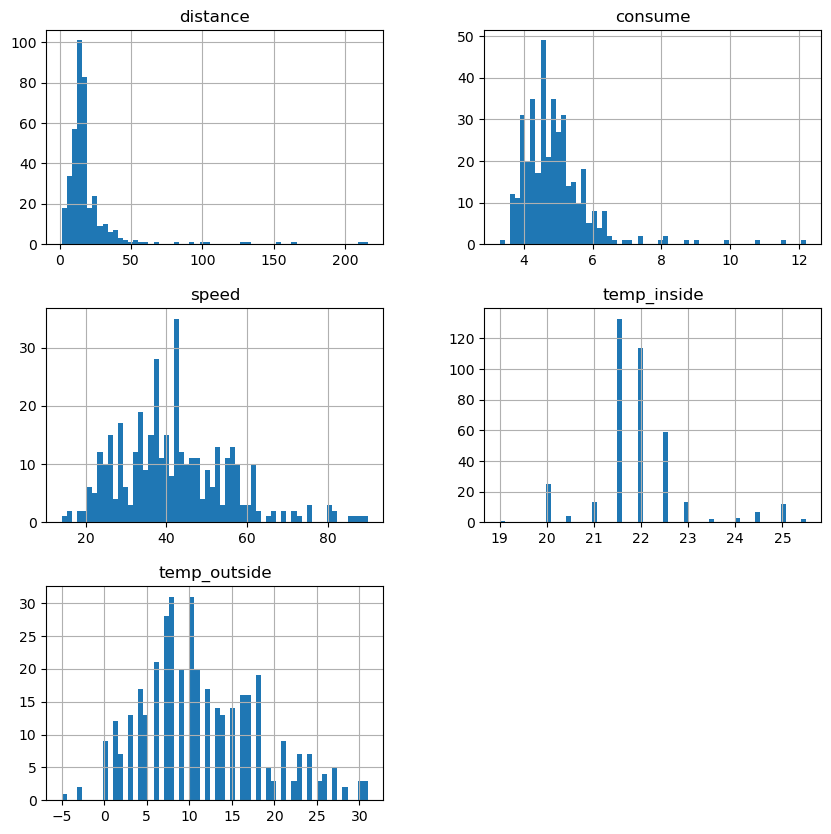

In [54]:
# Creating histograms for each numerical column in 'df1 numerical'
df[numerical].hist(figsize=(10, 10), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

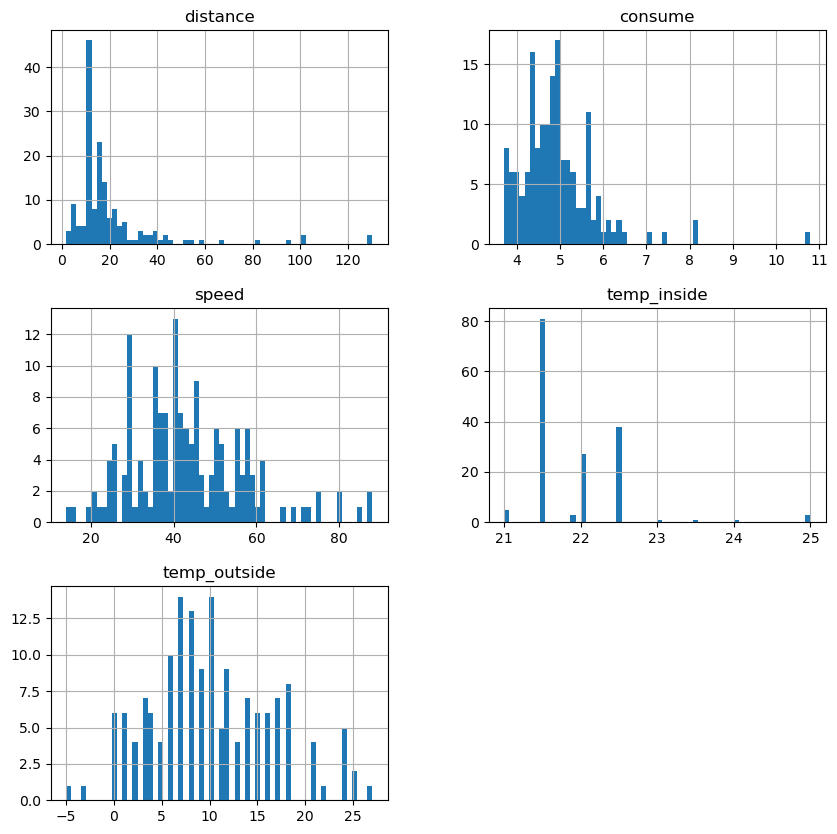

In [56]:
# Creating histograms for each numerical column in 'df1 numerical'
df_E10[numerical].hist(figsize=(10, 10), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

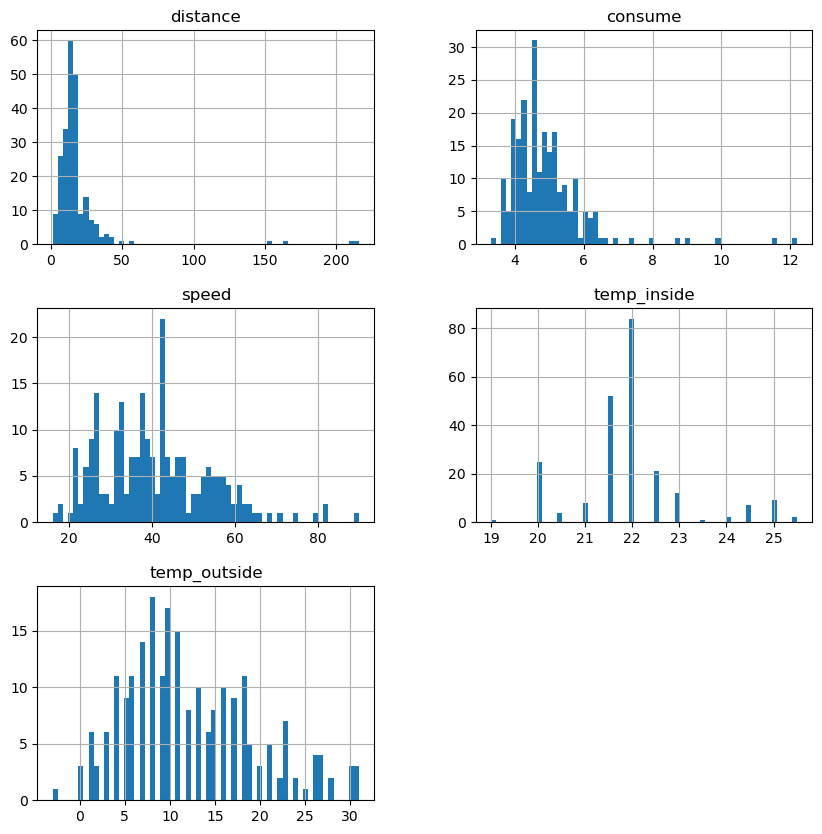

In [57]:
# Creating histograms for each numerical column in 'df1 numerical'
df_SP98[numerical].hist(figsize=(10, 10), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

In [62]:
df_E10[numerical].describe(),  df_SP98[numerical].describe()
# close average consumption for lower speed
# conso E10/SP98 = 1.0065577 vs speed E10/SP98 = 1.0658026 ... => higher consumption for SP98?

(         distance     consume       speed  temp_inside  temp_outside
 count  160.000000  160.000000  160.000000   160.000000    160.000000
 mean    21.096250    4.931250   43.506250    21.917429     10.118750
 std     20.307234    0.900956   14.077949     0.653602      6.392185
 min      1.700000    3.700000   14.000000    21.000000     -5.000000
 25%     12.075000    4.400000   35.000000    21.500000      6.000000
 50%     15.400000    4.800000   42.000000    21.500000      9.000000
 75%     21.200000    5.300000   51.000000    22.500000     14.250000
 max    130.300000   10.800000   88.000000    25.000000     27.000000,
          distance     consume       speed  temp_inside  temp_outside
 count  228.000000  228.000000  228.000000   228.000000    228.000000
 mean    18.639912    4.899123   40.820175    21.938007     12.228070
 std     24.179598    1.118408   13.170122     1.177840      7.271373
 min      1.300000    3.300000   16.000000    19.000000     -3.000000
 25%     11.800000 

<Axes: xlabel='speed', ylabel='consume'>

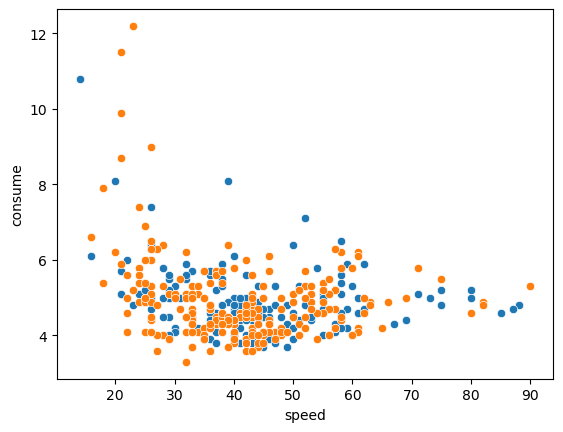

In [64]:
# Plotting consumption vs speed, for both type of gas
sns.scatterplot(data=df_E10, x= 'speed', y = 'consume')
sns.scatterplot(data=df_SP98, x= 'speed', y = 'consume' )
### my comments: is orange (SP98) a bit above for the same average speeds ?

<Axes: xlabel='distance', ylabel='consume'>

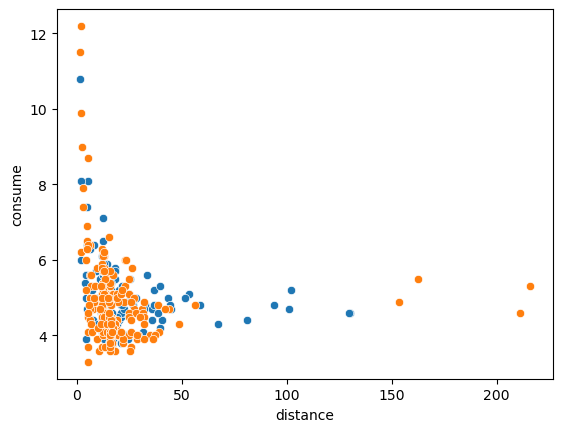

In [65]:
# Plotting the consumption and distance, does not seem to show differences...
sns.scatterplot(data=df_E10, x= 'distance', y = 'consume')
sns.scatterplot(data=df_SP98, x= 'distance', y = 'consume' )

<Axes: xlabel='temp_outside', ylabel='consume'>

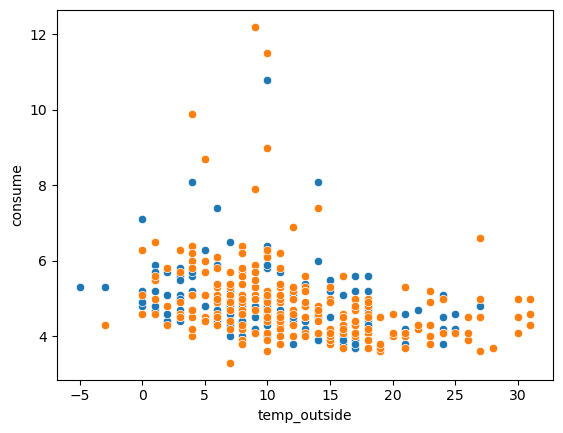

In [66]:
# Plotting the consumption and outside temperature, does not seem to show differences...
sns.scatterplot(data=df_E10, x= 'temp_outside', y = 'consume')
sns.scatterplot(data=df_SP98, x= 'temp_outside', y = 'consume' )

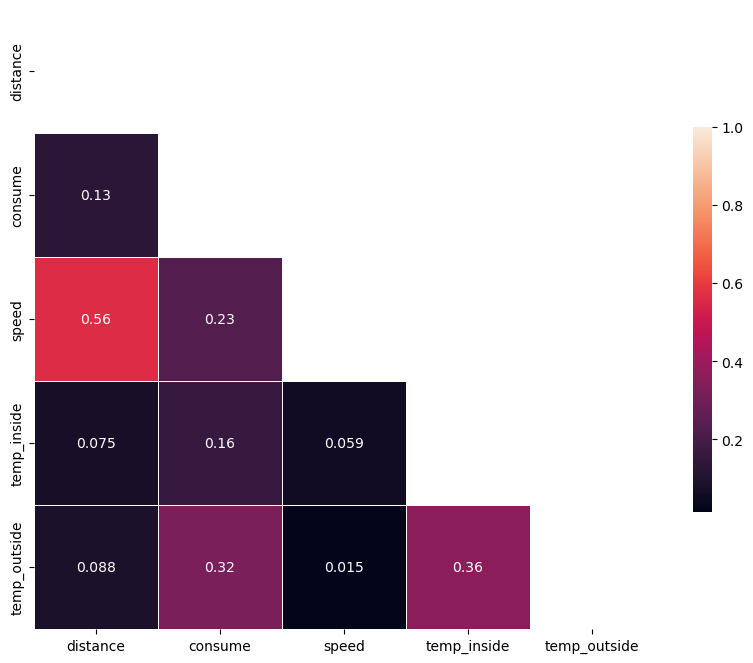

In [67]:
# Correlation heatmap for the dataframe looking at both gas population
df_new = df[numerical]

corr=np.abs(df_new.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

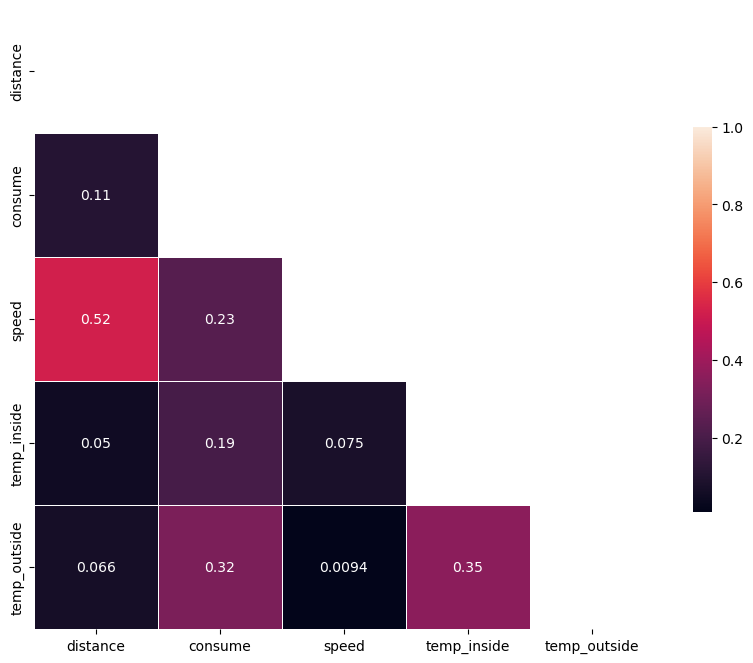

In [69]:
# Correlation heatmap for the dataframe looking at E10 or SP98 gas population
df_new = df_SP98[numerical]

corr=np.abs(df_new.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

PART II: AB Testing

In [ ]:
# Idea for AB testing, for the same average speed, conso SP98 is more or less conso E10 ??


In [90]:
numerical = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']
categorical = ['gas_type', 'AC', 'rain', 'sun']


#Set the hypothesis

#H0: consumption E10 <= consumption SP98
#H1: consumption E10 > consumption SP98

significance_level = 0.05

t_stat, p_value= st.ttest_ind(df_E10[numerical]['consume'], df_SP98[numerical]['consume'], equal_var=False, alternative = "greater")
    
print(f' p_value = {p_value}')
if p_value > significance_level:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")


 p_value = 0.37736070294426416
We are not able to reject the null hypothesis


In [78]:
# same but trying with Manwhitneyu

#Set the hypothesis

#H0: consumption SP98 <= consumption E10
#H1: consumption SP98 > consumption E10

significance_level = 0.05
u_stat, p_value_mw_con = st.mannwhitneyu(df_SP98[numerical]['consume'], df_E10[numerical]['consume'], alternative = "greater")
    
print(f' p_value_mw_con = {p_value_mw_con}')
if p_value_mw_con > significance_level:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")

 p_value_mw_con = 0.897931485573079
We are not able to reject the null hypothesis


In [79]:
# Trying the same but before removing the outliers for average speed: => not better than without the outiers.
# The function to remove the outliers
def removing_tukeys_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    not_outliers = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    
    return not_outliers

In [147]:
#new_df = removing_tukeys_outliers(df,'speed') => not better than without the outiers.

# trying with speed range from 30 to 54
new_df = df[(26 <= df.speed) & (df.speed <= 54)]

In [148]:
new_df_E10 = new_df[new_df['gas_type'] == 'E10']
new_df_SP98 = new_df[new_df['gas_type'] == 'SP98']

In [149]:
#Set the hypothesis

#H0: consumption SP98 >= consumption E10
#H1: consumption SP98 < consumption E10

significance_level = 0.05

t_stat, p_value_new= st.ttest_ind(new_df_SP98[numerical]['consume'], new_df_E10[numerical]['consume'], equal_var=False, alternative = "less")
    
print(f' p_value_new = {p_value_new}')
if p_value_new > significance_level:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis") # means consumption SP98 is less than E10 for 30<=speed<=54

 p_value_new = 0.02757441286993821
We reject the null hypotesis


In [150]:
new_df_SP98['consume'].mean(), new_df_E10['consume'].mean()

(4.643478260869565, 4.824347826086957)

In [151]:
new_df_SP98['consume'].count(), new_df_E10['consume'].count()

(161, 115)

In [152]:
test_E10 = new_df_E10[['consume', 'speed']].groupby(['speed']).mean()
test_SP98 = new_df_SP98[['consume', 'speed']].groupby(['speed']).mean()
test_E10.reset_index(inplace=True)
test_SP98.reset_index(inplace=True)

<Axes: xlabel='speed', ylabel='consume'>

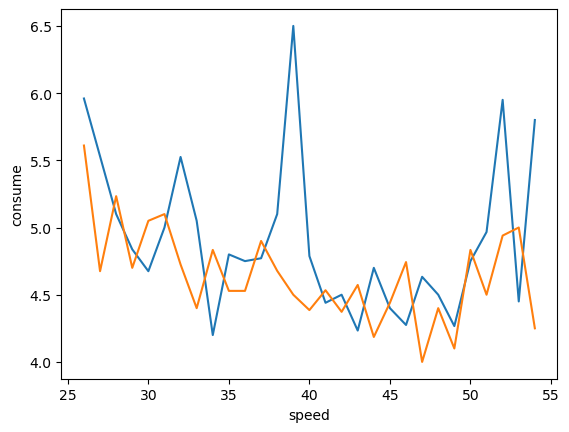

In [153]:
# Plotting the consumption and speed, does not seem to show differences...
sns.lineplot(data=test_E10, x= 'speed', y = 'consume')
sns.lineplot(data=test_SP98, x= 'speed', y = 'consume' )

In [154]:
test_E10.shape, test_SP98.shape

((28, 2), (29, 2))

In [155]:
difference_consumption = test_E10.consume - test_SP98.consume
difference_consumption.mean()
# on this speed range the difference of consumption is of 0.26 l/100km for the range 30-54 km/h

0.23047979797979806

In [ ]:
Part III: Machine Learning, can I predict the consumption

In [213]:
# Let's see if we can infer the consumption
# Need to create a train and a test groups
# First we need to one hot encode gas_type (0 for SP98, 1 for E10)
df_enc= df.copy()

In [214]:
df_enc.gas_type=df_enc.gas_type.apply(lambda x: 0 if x == 'SP98' else 1)
df_enc

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,1,0,0,0
1,12.0,4.2,30,21.5,13,1,0,0,0
2,11.2,5.5,38,21.5,15,1,0,0,0
3,12.9,3.9,36,21.5,14,1,0,0,0
4,18.5,4.5,46,21.5,15,1,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0
384,16.1,4.3,38,25.0,31,0,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0,0
386,15.4,4.6,42,25.0,31,0,1,0,0


In [215]:
df_enc.gas_type.value_counts()

gas_type
0    228
1    160
Name: count, dtype: int64

In [216]:
# Perform train_test split to predict consume and normalizing.
features = df_enc.drop(columns=["consume"])
target = df_enc["consume"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#I normalize the data...
normalizer = MinMaxScaler()
normalizer.fit(X_train)  # VERY IMPORTANT we apply the fit of the normalizer to the X_train, not all the X data...

X_train_norm = normalizer.transform(X_train) # and here we apply the normalizer to transform the data
X_test_norm = normalizer.transform(X_test) # (both X_train and X_test populations)

#X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
#X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)


In [238]:
# Model selection we will be using KNN as our predictive model.

knn = KNeighborsRegressor(n_neighbors=9)


In [239]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=9)

In [240]:
knn.score(X_test_norm, y_test)  # 0.08446696 for 100 neighbors, 0.1659455 for 50 neighbors, 0.1972028 for 25n, 0.272679 for 9n

0.27267976660870374

In [241]:
#Evaluating the model
pred = knn.predict(X_test_norm)

MSE = mean_squared_error(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)

print(MSE)
print(RMSE)

1.2555096549540998
1.1204952721694545


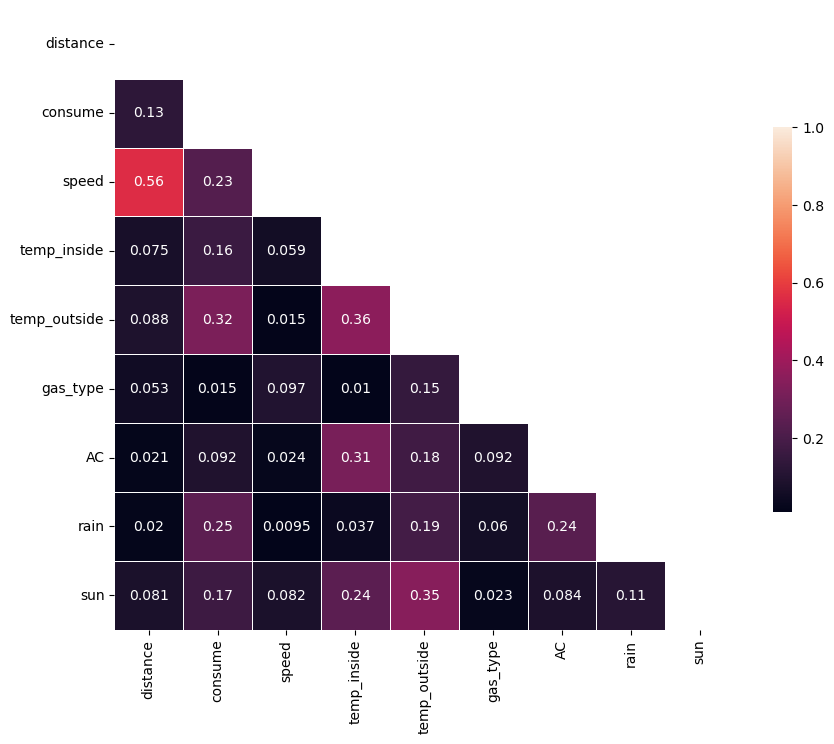

In [242]:
corr=np.abs(df_enc.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

Making a second model, without some features: temp_outside, temp_inside, rain, sun and AC
Keeping only speed and distance...

In [261]:
# Perform train_test split to predict consume and normalizing.
features = df_enc.drop(columns=["consume", "AC","rain", "sun", "temp_outside", "temp_inside",'speed'])
target = df_enc["consume"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#I normalize the data...
normalizer = MinMaxScaler()
normalizer.fit(X_train)  # VERY IMPORTANT we apply the fit of the normalizer to the X_train, not all the X data...

X_train_norm = normalizer.transform(X_train) # and here we apply the normalizer to transform the data
X_test_norm = normalizer.transform(X_test) # (both X_train and X_test populations)

#X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
#X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

# Model selection we will be using KNN as our predictive model.
knn = KNeighborsRegressor(n_neighbors=9)

knn.fit(X_train_norm, y_train)

knn.score(X_test_norm, y_test)  

# was 0.272679 for 9n Model 1 (all features), 0.484984424 for Model 2 (distance+speed), 
# 0.523775 for Model (only distance+gas_type)

0.541967536079291

In [270]:
#Trying with only the linear regression:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Perform train_test split to predict consume and normalizing.
features = df_enc.drop(columns=["consume", "sun"])
target = df_enc["consume"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# Normalize the data
normalizer = MinMaxScaler()
normalizer.fit(X_train)  

X_train_norm = normalizer.transform(X_train) 
X_test_norm = normalizer.transform(X_test) 

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_norm, y_train)

# Make predictions
y_pred = model.predict(X_test_norm)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.1367616403767018
